In [ ]:
import csv
import datetime
import requests
import pandas as pd

In [ ]:
def download_mimer_data(date_start, date_end, areas):
    dfs = []
    url_base = 'https://mimer.svk.se/'
    for area in areas: 
        url_target = 'ConsumptionProfile/DownloadText?groupByType=0&' + \
                     'PeriodFrom='+date_start.split('-')[1]+'%2F'+date_start.split('-')[2]+'%2F'+date_start.split('-')[0]+'%2000%3A00%3A00&' + \
                     'PeriodTo='+date_end.split('-')[1]+'%2F'+date_end.split('-')[2]+'%2F'+date_end.split('-')[0]+'%2000%3A00%3A00&' + \
                     'networkAreaIdString='+area
        
        url = url_base+url_target
        r = requests.get(url)
        decoded_content = r.content.decode('utf-8')
        csv_file = csv.reader(decoded_content.splitlines(), delimiter=';')
        rows = list(csv_file)
        rows = rows[1:-1] # Remove first and last line

        date, data = [], []
        for row in rows: 
            date.append(row[0])
            data.append(-float(row[1].replace(',', '.')))

        df = pd.DataFrame(data=data, index=date, columns=[area])
        df.index = pd.to_datetime(df.index)-datetime.timedelta(hours=1)
        df.index = df.index.tz_localize('UTC')
        dfs.append(df)

    df_SE = pd.concat(dfs, axis=1, join='outer')
    
    return df_SE

In [ ]:
# Try to change dates and areas here
date_start = '2019-10-01'
date_end = '2020-12-10'
areas = ['AVE', 'JRA', 'SKD']
df_SE = download_mimer_data(date_start, date_end, areas)

In [ ]:
df_SE.index[-1]

Timestamp('2020-12-10 22:00:00+0000', tz='UTC')

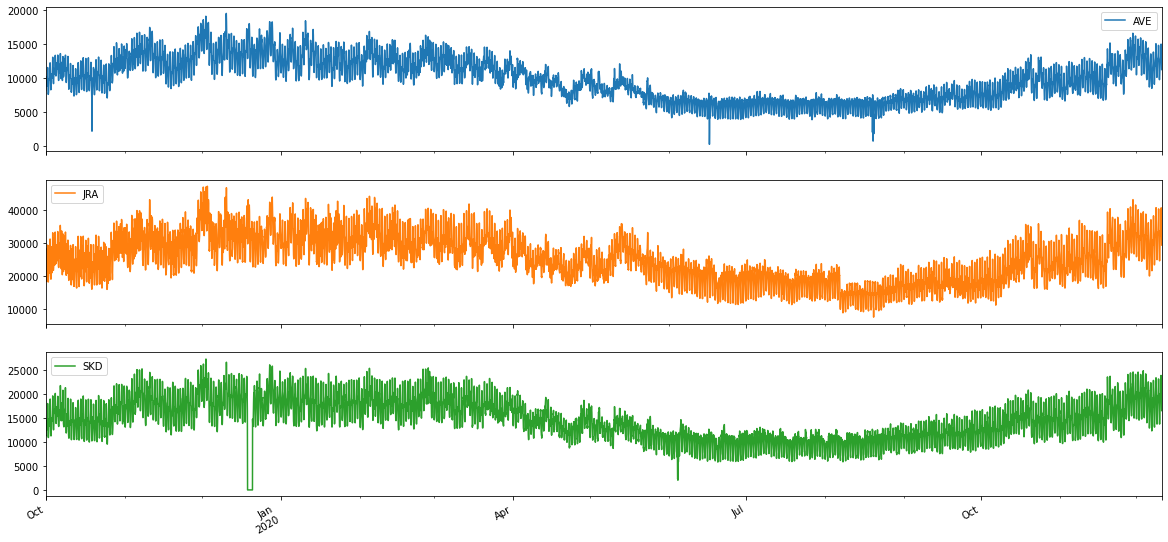

In [ ]:
df_SE.plot(subplots=True, figsize=(20,10));